 # Figure about remapping between search and homing path
 

In [3]:
%load_ext autoreload
%autoreload 2
%run setup_project.py
prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 40 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|███████████████████████████████████████████| 40/40 [00:30<00:00,  1.31it/s]


Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


You will need about 6Gb of RAM for the next command.

In [6]:
%%time
myProject = loadMyProjectWithTrials(myProject)

Loading: /adata/projects/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 7.75 s, sys: 4.51 s, total: 12.3 s
Wall time: 22.7 s


Load the maps and co for open field, light and dark trials

In [7]:
fn = "/adata/projects/autopi_ca1/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)

fn = "/adata/projects/autopi_ca1/results/myMapStats.csv" # , data frame with hd stats
mapStats = pd.read_csv(fn)

fn = "/adata/projects/autopi_ca1/results/myAutos.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myAutos = pickle.load(handle)
    
fn=myProject.dataPath+"/results/mapCorDf.csv"
mapCorDf = pd.read_csv(fn)

fn=myProject.dataPath+"/results/pairs_ifrAsso_mapSim.csv"
print("Loading ",fn)
pairDf = pd.read_csv(fn)

Loading  /adata/projects/autopi_ca1/results/pairs_ifrAsso_mapSim.csv


Load the maps and co for search and homing paths.

I am using the same names as above, but with SH as prefix

In [8]:
fn = "/adata/projects/autopi_ca1/results/mySearchHomingMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    SHmyMaps = pickle.load(handle)

fn = "/adata/projects/autopi_ca1/results/mySearchHomingMapStats.csv" # , data frame with hd stats
SHmapStats = pd.read_csv(fn)

fn=myProject.dataPath+"/results/searchHomingMapCorDf.csv"
print("Loading",fn)
SHmapCorDf = pd.read_csv(fn)

fn=myProject.dataPath+"/results/searchHomingPairs_ifrAsso_mapSim.csv"
print("Loading",fn)
SHpairDf = pd.read_csv(fn)

Loading /adata/projects/autopi_ca1/results/searchHomingMapCorDf.csv
Loading /adata/projects/autopi_ca1/results/searchHomingPairs_ifrAsso_mapSim.csv


In [9]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)


In [10]:
SHmapCorDf.condition.unique()

array(['slhl', 'sdhd', 'slsd', 'hlhd', 'slhd', 'sdhl', 'sl1sl2', 'sd1sd2',
       'hl1hl2', 'hd1hd2'], dtype=object)

Check data integrity

In [11]:
for k in myMaps:
    print(myMaps[k].shape)
for k in myAutos:
    print(myAutos[k]["auto"].shape)
for k in SHmyMaps:
    print(SHmyMaps[k].shape)
print(ct.shape)
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 34, 50)
(1297, 100)
(1297, 400)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 8)


## Limit analysis to CA1 pyramidal cells

In [12]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("CA1 pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))

CA1 pyramidal cells: 441


In [13]:
for key in myMaps:
    myMaps[key]=myMaps[key][pyrIndices]
for key in myAutos:
    myAutos[key]["auto"]=myAutos[key]["auto"][pyrIndices]
for key in SHmyMaps:
    SHmyMaps[key]=SHmyMaps[key][pyrIndices]

In [14]:
mapStats = mapStats[mapStats.cellId.isin(pyrId)]
SHmapStats = SHmapStats[SHmapStats.cellId.isin(pyrId)]

In [15]:
nCond = len(mapCorDf.condition.unique())

In [16]:
mapCorDf["cellId"] = np.concatenate([ct.id.to_numpy()]*nCond) # 4 because of 4 conditions
mapCorDf = mapCorDf[mapCorDf.cellId.isin(pyrId)]

In [17]:
nCond = len(SHmapCorDf.condition.unique())
SHmapCorDf["cellId"] = np.concatenate([ct.id.to_numpy()]*nCond) # 
SHmapCorDf = SHmapCorDf[SHmapCorDf.cellId.isin(pyrId)]

In [18]:
pairPyrIndices = np.logical_and(np.isin(pairDf.id1,pyrId),np.isin(pairDf.id2,pyrId)) # id1 and id2 in the pair are pyr
pairDf = pairDf[pairPyrIndices]

In [19]:
pairPyrIndices = np.logical_and(np.isin(SHpairDf.id1,pyrId),np.isin(SHpairDf.id2,pyrId)) # id1 and id2 in the pair are pyr
SHpairDf = SHpairDf[pairPyrIndices]

In [20]:
for k in myMaps:
    print(k)
    print(myMaps[k].shape)
for k in SHmyMaps:
    print(k)

circ80
(441, 34, 50)
circ80_1
(441, 34, 50)
circ80_2
(441, 34, 50)
task
(441, 34, 50)
task_1
(441, 34, 50)
task_2
(441, 34, 50)
light
(441, 34, 50)
light_arena
(441, 34, 50)
dark
(441, 34, 50)
dark_arena
(441, 34, 50)
light_1
(441, 34, 50)
light_2
(441, 34, 50)
dark_1
(441, 34, 50)
dark_2
(441, 34, 50)
all_light
(441, 34, 50)
all_light_1
(441, 34, 50)
all_light_2
(441, 34, 50)
all_dark
(441, 34, 50)
all_dark_1
(441, 34, 50)
all_dark_2
(441, 34, 50)
searchPath_light
searchPath_light_1
searchPath_light_2
searchPath_dark
searchPath_dark_1
searchPath_dark_2
homingPath_light
homingPath_light_1
homingPath_light_2
homingPath_dark
homingPath_dark_1
homingPath_dark_2


In [21]:
pyrId = pyrId.reset_index(drop=True)
pyrId

0       mn5824-20112020-0107_92
1      mn5824-20112020-0107_100
2      mn5824-20112020-0107_114
3      mn5824-20112020-0107_116
4      mn5824-20112020-0107_118
                 ...           
436     mn9686-01112021-0106_79
437     mn9686-01112021-0106_81
438    mn9686-01112021-0106_197
439    mn9686-01112021-0106_242
440    mn9686-01112021-0106_246
Name: id, Length: 441, dtype: object

## Figure

We have 4 conditions, sl, sd, hl, hd.

We want to show some examples of search and homing paths, with some firing rate maps next to them.

Plot all the maps for the search and homing conditions to have an idea of the behavior of the neurons.


In [22]:
idSelection = [ 'mn5824-24112020-0107_112',
 'mn5824-24112020-0107_114',
 'mn2739-16022021-0106_166',
 'mn2739-16022021-0106_168',
 'mn3246-09042021-0106_4',
 'mn3246-10042021-0106_236',
 'mn1173-06052021-0107_114',
 'mn1173-09052021-0108_27',
 'mn5618-12072021-0110_458',
 'TYY5622-20092021-0106_39',
 'mn9686-27102021-0106_36',
 'mn9686-29102021-0106_180',
 'mn9686-29102021-0106_192',
 'mn9686-29102021-0106_307',
 'mn9686-01112021-0106_9',
 'mn9686-01112021-0106_64',
 'mn9686-01112021-0106_73']

In [23]:
idSelection = [ 
 'mn5824-24112020-0107_114',
 'mn9686-29102021-0106_180',
 'mn9686-27102021-0106_36',
 'mn9686-01112021-0106_64',
 'mn9686-01112021-0106_73',
 'mn9686-01112021-0106_9']

mn5824-24112020-0107_114 27
mn9686-29102021-0106_180 379
mn9686-27102021-0106_36 302
mn9686-01112021-0106_64 430
mn9686-01112021-0106_73 433
mn9686-01112021-0106_9 409
saving /adata/projects/autopi_ca1/results/remappingTask.png


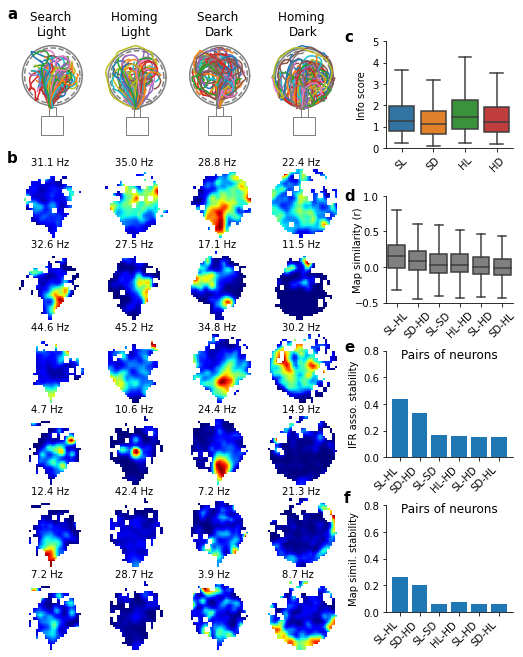

In [26]:
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats

# to display names that are ok for the reader
condNames={"searchPath_light": {"1":"Search","2":"Light"},
          "homingPath_light": {"1": "Homing","2":"Light"},
          "searchPath_dark": {"1":"Search","2":"Dark"},
          "homingPath_dark": {"1":"Homing","2":"Dark"}}

col=6
row=len(idSelection)+1
sizePerCol=1.5
sizePerRow=1.5

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on

ses,sSes = list(zip(myProject.sessionList,sSesList))[-1]
# get navPath data
ifr, navs, inav  = load_ifr_behavior(ses)
# create an neuronAutopi to get intervals of search and homing paths, we use it to get intervals
neuronIndex=0 # not important, we just need a valid neuron
na = NeuronAutopi(name="hey",ifr = (ifr[0][neuronIndex,:],ifr[1]),navPathSummary=navs,iNavPath=inav,trialElectro=ses.trialList[0]) 


#grid spec object
gs = fig.add_gridspec(nrows=5, ncols=col,wspace=0.0,hspace=0.2)
for i,(pt,l) in enumerate(zip(["searchPath","homingPath","searchPath","homingPath"],
                             ["light", "light", "dark", "dark"])):
        ax = fig.add_subplot(gs[0,i])
        condName1 = condNames["{}_{}".format(pt,l)]["1"]
        condName2 = condNames["{}_{}".format(pt,l)]["2"]
        myTitle = condName1+" \n"+condName2
        na.plotNavPath( ax, navPathType = pt, light=l ,title=myTitle,xlabel="",ylabel="")
        
        ax.axis("off")
        

# firing rate maps
gsMap = fig.add_gridspec(nrows=row, ncols=col,
                        wspace=0.0,hspace=0.19,top = 0.82, bottom=0.075)
selected_cells= idSelection[:(row-1)]

for j, cellId in enumerate(selected_cells):
    cellIndex = pyrId[pyrId==cellId].index.item()
    print(cellId,cellIndex)
    for i,(pt,l) in enumerate(zip(["searchPath","homingPath","searchPath","homingPath"],
                                 ["light", "light", "dark", "dark"])):
       
        ax = fig.add_subplot(gsMap[j+1,i])
        cond=pt+"_"+l
        ax.imshow(SHmyMaps[cond][cellIndex][:,15:-5].T,origin="lower",cmap='jet')
        myText="{:.1f} Hz".format(np.nanmax(SHmyMaps[cond][cellIndex]))
        ax.text(7,SHmyMaps[cond][cellIndex].shape[1]-19,myText)
        ax.axis('off')

        
# histograms with ...
gsStats = fig.add_gridspec(nrows=4, ncols=col,
                           hspace=0.45,wspace=0.25,left=0.27)


# info score
ax = fig.add_subplot(gsStats[0,4:]) # spread across 2 columns
df = SHmapStats[SHmapStats.condition.isin(["searchPath_light","homingPath_light","searchPath_dark","homingPath_dark"])]
df = df[df.meanRate>0.2]

ax = sns.boxplot(x="condition", y="info", data=df,showfliers = False)
ax.set_ylim(0,5)
ax.set_xlabel("")
ax.set_ylabel("Info score")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(labels=["SL","SD","HL","HD"], rotation=45)
ax.yaxis.set_label_coords(-0.15, 0.5)


# map similarity
ax = fig.add_subplot(gsStats[1,4:]) # spread across 2 columns
df = SHmapCorDf[SHmapCorDf.condition.isin(SHmapCorDf.condition.unique()[:6])]
ax = sns.boxplot(x="condition", y="r", data=df,showfliers = False)
ax.set_ylim(-0.5,1.0)
ax.set_xlabel("")
ax.set_ylabel("Map similarity (r)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["SL-HL","SD-HD","SL-SD","HL-HD","SL-HD","SD-HL"], rotation=45)
ax.yaxis.set_label_coords(-0.18, 0.5)
for i in range(0,6):
    mybox = ax.artists[i]
    mybox.set_facecolor("gray")


# firing associations IFR and map similarity
cond_pairs = [("searchPath_light","homingPath_light"),("searchPath_dark","homingPath_dark"),
              ("searchPath_light","searchPath_dark"),("homingPath_light","homingPath_dark"),
              ("searchPath_light","homingPath_dark"),("searchPath_dark","homingPath_light"),
              ("searchPath_light_1","searchPath_light_2"),("searchPath_dark_1","searchPath_dark_2"),("homingPath_light_1","homingPath_light_2"),("homingPath_dark_1","homingPath_dark_2")  ]
prefix = ["ifrAsso","mapSim"]
prefix_names = {"ifrAsso": "IFR asso.", "mapSim": "Map simil."}
cond_names = {"searchPath_light": "SL", "homingPath_light":"HL","searchPath_dark":"SD","homingPath_dark":"HD",
              "searchPath_light_1":"SL1","searchPath_light_2":"SL2","searchPath_dark_1":"SD1","searchPath_dark_2":"SD2",
              "homingPath_light_1":"HL1","homingPath_light_2":"HL2","homingPath_dark_1":"HD1","homingPath_dark_2":"HD2"}

r_values = np.empty((len(prefix),len(cond_pairs)))
for i,(cond1,cond2) in enumerate(cond_pairs):
    for j, p in enumerate(prefix):
        a = SHpairDf[p+"_"+cond1]
        b = SHpairDf[p+"_"+cond2]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        r,pv =pearsonr(a[indices],b[indices])
        r_values[j,i]=r
        
prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map simil. stability"}
for j, p in enumerate(prefix):
    ax = fig.add_subplot(gsStats[2+j,4:])
    xpos = np.arange(len(r_values[j,:6]))
    ax.bar(xpos,r_values[j,:6])
    ax.set_ylim(0.0,0.8)
    ax.set_xticks(xpos)
    ax.set_xticklabels(["SL-HL","SD-HD","SL-SD","HL-HD","SL-HD","SD-HL"], rotation=45,horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(prefix_names[p])
    ax.set_title("Pairs of neurons",y=0.875)
    

plt.text(0.12,0.91, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.12,0.72, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.64,0.88, 'c', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.64,0.67, 'd', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.64,0.47, 'e', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.64,0.27, 'f', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)



fn = myProject.dataPath+"/results/remappingTask.png"
print("saving",fn)
plt.savefig(fn)


saving /adata/projects/autopi_ca1/results/firingAssociations.png


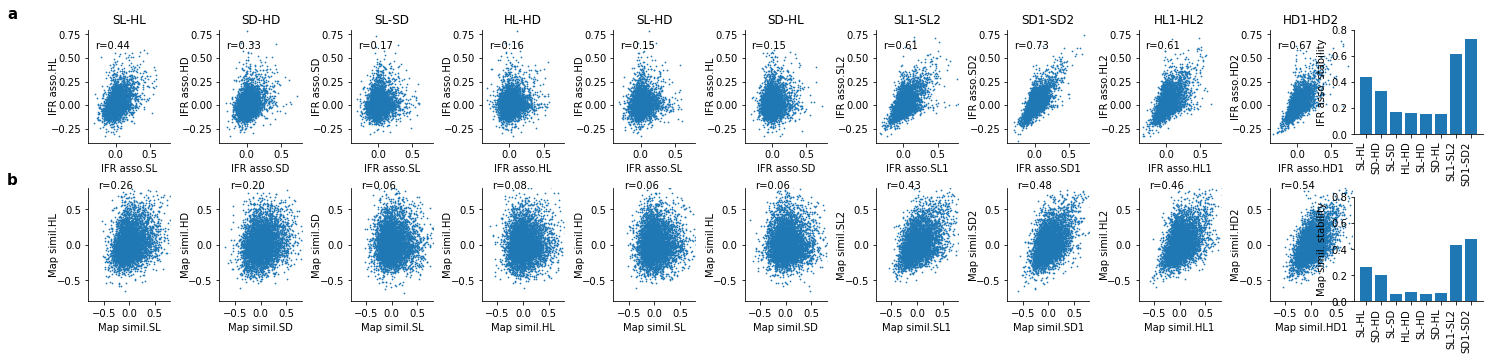

In [62]:

from scipy.stats import pearsonr
cond_pairs = [("searchPath_light","homingPath_light"),("searchPath_dark","homingPath_dark"),
              ("searchPath_light","searchPath_dark"),("homingPath_light","homingPath_dark"),
              ("searchPath_light","homingPath_dark"),("searchPath_dark","homingPath_light"),
              ("searchPath_light_1","searchPath_light_2"),("searchPath_dark_1","searchPath_dark_2"),("homingPath_light_1","homingPath_light_2"),("homingPath_dark_1","homingPath_dark_2")  ]
prefix = ["ifrAsso","mapSim"]
prefix_names = {"ifrAsso": "IFR asso.", "mapSim": "Map simil."}
cond_names = {"searchPath_light": "SL", "homingPath_light":"HL","searchPath_dark":"SD","homingPath_dark":"HD",
              "searchPath_light_1":"SL1","searchPath_light_2":"SL2","searchPath_dark_1":"SD1","searchPath_dark_2":"SD2",
              "homingPath_light_1":"HL1","homingPath_light_2":"HL2","homingPath_dark_1":"HD1","homingPath_dark_2":"HD2"}
fig = plt.figure(figsize=(25,5))



### scatter plots
gsScatter = fig.add_gridspec(nrows=2, ncols=len(cond_pairs)+1,
                           hspace=0.4,wspace=0.6)

r_values = np.empty((len(prefix),len(cond_pairs)))
for i,(cond1,cond2) in enumerate(cond_pairs):
    for j, p in enumerate(prefix):
        a = SHpairDf[p+"_"+cond1]
        b = SHpairDf[p+"_"+cond2]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        r,pv =pearsonr(a[indices],b[indices])
        r_values[j,i]=r
        ax = fig.add_subplot(gsScatter[j,i])
        ax.scatter(a,b,s=0.5)
        if j ==0:
            ax.set_title(cond_names[cond1]+"-"+ cond_names[cond2] )
        ax.set_xlabel(prefix_names[p]+cond_names[cond1])
        ax.set_ylabel(prefix_names[p]+cond_names[cond2])
        if j == 0:
            ax.set_xlim(-0.4,0.8)
            ax.set_ylim(-0.4,0.8)
            ax.text(-0.3,0.6,"r={:.2f}".format(r))
        if j == 1:
            ax.set_xlim(-0.80,0.80)
            ax.set_ylim(-0.80,0.80)
            ax.text(-0.6,0.8,"r={:.2f}".format(r))
        ax.yaxis.set_label_coords(-0.35, 0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        
### summary plots
gsScatter = fig.add_gridspec(nrows=2, ncols=8,
                           hspace=0.6,wspace=0.4)     


prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map simil. stability"}
for j, p in enumerate(prefix):
    ax = fig.add_subplot(gsScatter[j,7])
    xpos = np.arange(len(r_values[j,:8]))
    ax.bar(xpos,r_values[j,:8])
    ax.set_ylim(0.0,0.8)
    ax.set_xticks(xpos)
    ax.set_xticklabels(["SL-HL","SD-HD","SL-SD","HL-HD","SL-HD","SD-HL","SL1-SL2","SD1-SD2"], rotation=90,horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(prefix_names[p])

plt.text(0.08,0.91, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.08,0.45, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)


fn = myProject.dataPath+"/results/firingAssociations.png"
print("saving",fn)
plt.savefig(fn)


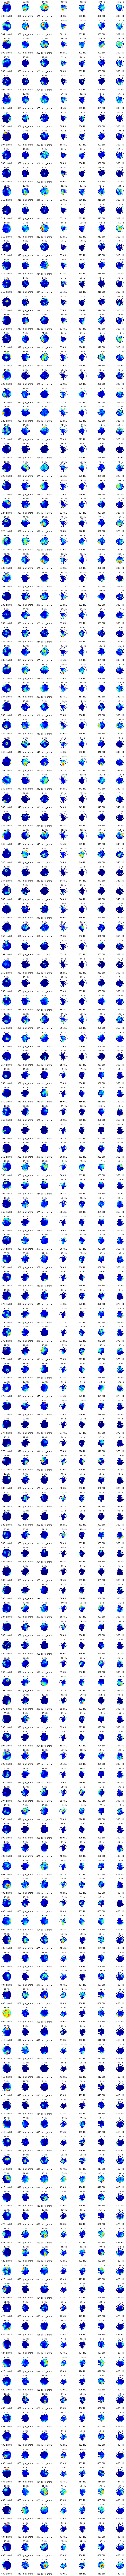

In [44]:
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats

# to display names that are ok for the reader
condNames={"searchPath_light":"SL",
          "homingPath_light": "HL",
          "searchPath_dark": "SD",
          "homingPath_dark": "HD"}

col=7
row=pyrId.shape[0]
sizePerCol=2.0
sizePerRow=2.0

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on

# firing rate maps
gsMap = fig.add_gridspec(nrows=row, ncols=col,wspace=0.0,hspace=0.3)

for cellIndex in range(300,440):
    
    for j,cond in enumerate(["circ80","light_arena", "dark_arena"]):
        ax = fig.add_subplot(gsMap[cellIndex,j])
        ax.imshow(myMaps[cond][cellIndex].T,origin="lower",cmap='jet')
        myText="{:.1f} Hz".format(np.nanmax(myMaps[cond][cellIndex]))
        ax.text(7,myMaps[cond][cellIndex].shape[1]-2,myText)
        ax.set_title("{} {}".format(cellIndex, cond),y=-0.1)
        ax.axis('off')

    
    
    for i,(pt,l) in enumerate(zip(["searchPath","homingPath","searchPath","homingPath"],
                                 ["light", "light", "dark", "dark"])):
        ax = fig.add_subplot(gsMap[cellIndex,i+3])
        cond=pt+"_"+l
        ax.imshow(SHmyMaps[cond][cellIndex].T,origin="lower",cmap='jet')
        myText="{:.1f} Hz".format(np.nanmax(SHmyMaps[cond][cellIndex]))
        ax.text(7,SHmyMaps[cond][cellIndex].shape[1]-2,myText)

        ax.set_title("{} {}".format(cellIndex, condNames[cond]),y=-0.1)
        ax.axis('off')
        
        
plt.savefig("/adata/projects/autopi_ca1/results/searchHomingMaps.pdf")